In [1]:
import os
data_path = '../input/isic2019/data'

In [2]:
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [3]:
num_classes = 8

my_model = Sequential()
my_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
my_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_model.layers[0].trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [4]:
my_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
from tensorflow.python.keras.applications.resnet import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [6]:
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
train_generator = data_generator.flow_from_directory(
        os.path.join(data_path, 'train'),
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        os.path.join(data_path, 'test'),
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 20269 images belonging to 8 classes.
Found 5062 images belonging to 8 classes.


In [9]:
# fit the model
r = my_model.fit_generator(
  train_generator,
  steps_per_epoch=250,
  validation_steps=60,
  validation_data=validation_generator,
  epochs=25
)

Train for 250 steps, validate for 60 steps
Epoch 1/25
250/250 [==============================] - 178s 711ms/step - loss: 1.1414 - accuracy: 0.6063 - val_loss: 1.6258 - val_accuracy: 0.5688
Epoch 2/25
250/250 [==============================] - 167s 669ms/step - loss: 1.0024 - accuracy: 0.6467 - val_loss: 2.1110 - val_accuracy: 0.5599
Epoch 3/25
250/250 [==============================] - 172s 690ms/step - loss: 0.9779 - accuracy: 0.6478 - val_loss: 1.7250 - val_accuracy: 0.5839
Epoch 4/25
250/250 [==============================] - 172s 687ms/step - loss: 0.9557 - accuracy: 0.6650 - val_loss: 1.9494 - val_accuracy: 0.5797
Epoch 5/25
250/250 [==============================] - 168s 674ms/step - loss: 0.8981 - accuracy: 0.6782 - val_loss: 1.7684 - val_accuracy: 0.5786
Epoch 6/25
250/250 [==============================] - 166s 665ms/step - loss: 0.8941 - accuracy: 0.6754 - val_loss: 1.8500 - val_accuracy: 0.5880
Epoch 7/25
250/250 [==============================] - 164s 658ms/step - loss: 0.8

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
r.history

{'loss': [1.141376172065735,
  1.0023973579406737,
  0.9778544774055481,
  0.9556935079097748,
  0.8983098213770967,
  0.8941491270905286,
  0.8803020522040703,
  0.8441645617485046,
  0.8171651282858263,
  0.8251862590312957,
  0.8223336455821991,
  0.7823196464338094,
  0.8187718663215637,
  0.7939359352588654,
  0.7879174678029869,
  0.7789157931804657,
  0.7857477437257767,
  0.7530759323835373,
  0.7408907372951508,
  0.75184757911735,
  0.772071115732193,
  0.7580895686929862,
  0.7322306051254273,
  0.7298928390741348,
  0.7366267865896226],
 'accuracy': [0.6063333,
  0.64666665,
  0.64783335,
  0.665,
  0.67824346,
  0.6754049,
  0.6835866,
  0.69883335,
  0.6989481,
  0.69783336,
  0.7043333,
  0.71514446,
  0.70233333,
  0.707,
  0.711805,
  0.716,
  0.70783335,
  0.72533333,
  0.72783333,
  0.7256637,
  0.71533334,
  0.7226582,
  0.7325,
  0.7305,
  0.72783333],
 'val_loss': [1.6258220305045445,
  2.110969014962514,
  1.725021376212438,
  1.9493526230255762,
  1.768424317240

Using TensorFlow backend.


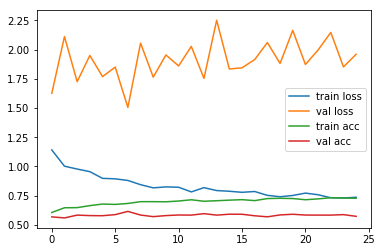

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('base_model_LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('base_model_AccVal_acc')

import tensorflow as tf

from keras.models import load_model

my_model.save('base_model.h5')